In [1]:
#Import matplotlib

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
tables = inspector.get_table_names()
print(tables)

['measurement', 'station']


In [20]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [22]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Precipitation Analysis

In [36]:
# Find the most recent date in the data set.
recent_date=session.query(func.max(Measurement.date)).all()
recent_date

[('2017-08-23')]

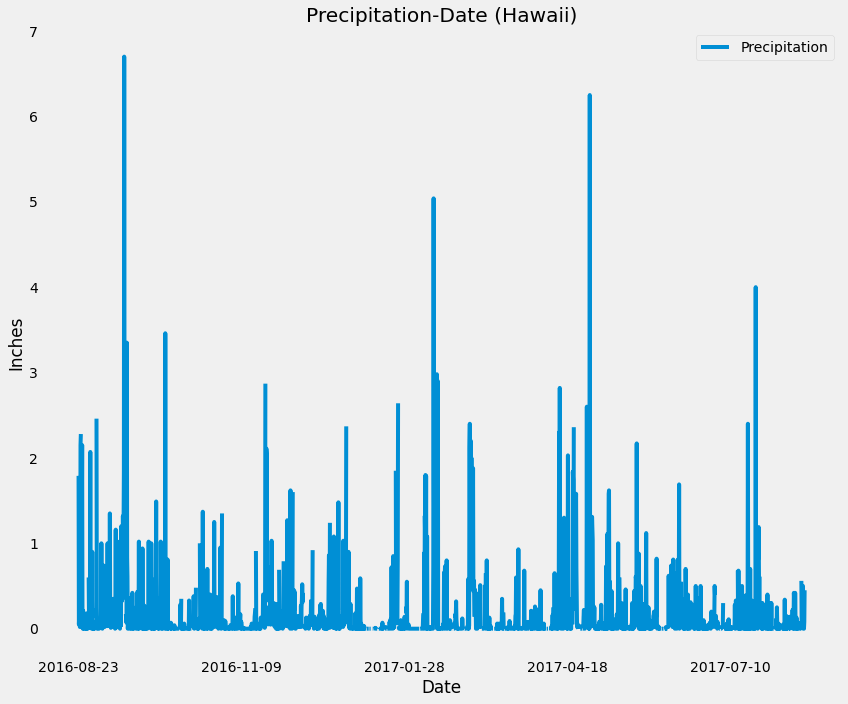

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
query_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(query_prcp, columns=['Date', 'Precipitation']).sort_values('Date')
df = df.set_index('Date')

df
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(12, 10))

plt.title("Precipitation-Date (Hawaii)")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.grid()

plt.tight_layout()
plt.show()

In [66]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number stations in the dataset
num_station = session.query(Station.station).count()
num_station

9

In [52]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station) \
                            .order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_id = active_station[0][0]

temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
                    .filter(Measurement.station == active_station_id).all()
print(f"Station ID : {active_station_id}, Lowest, highest, average temperature : {temp}")

Station ID : USC00519281, Lowest, highest, average temperature : [(54.0, 85.0, 71.66378066378067)]


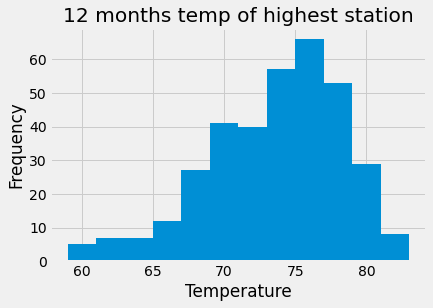

In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temp= session.query(Measurement.tobs).\
                    filter(Measurement.date >= "2016-08-23").\
                    filter(Measurement.station == active_station_id).all()

tobs_df = pd.DataFrame(active_station_temp, columns=['tobs'])

#histogram
plt.hist(tobs_df, bins=12)
plt.title("12 months temp of highest station")
labels = ['tobs']
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

# Close session

In [68]:
# Close Session
session.close()